Untuk dataset : https://drive.google.com/file/d/1eSAHIMOwanCxApF4oJWW5lG4HYdYz8NM/view?usp=sharing

fyi dataset yang ada di sini adalah dataset yang udah aku gabungin dari beberapa dataset yang ada di kaggle

dataset 1 : https://www.kaggle.com/datasets/nandanp6/cataract-image-dataset

dataset 2 : https://www.kaggle.com/datasets/akshayramakrishnan28/cataract-classification-dataset (full cataract)

dataset 3 : https://www.kaggle.com/datasets/himaniac/cataract-eye-dataset

Importing Dependencies

In [ ]:
# Import standard libraries
import os
import pandas as pd
import random
import shutil
import pathlib

# Import PIL for image processing
from PIL import Image

# Import matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2

In [ ]:
!gdown --id 1eSAHIMOwanCxApF4oJWW5lG4HYdYz8NM

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1eSAHIMOwanCxApF4oJWW5lG4HYdYz8NM
From (redirected): https://drive.google.com/uc?id=1eSAHIMOwanCxApF4oJWW5lG4HYdYz8NM&confirm=t&uuid=a58ce73d-455d-4a17-af95-4403c34b5187
To: /content/dataset.zip
100% 553M/553M [00:05<00:00, 98.9MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: test/
   creating: test/cataract/
  inflating: test/cataract/image_246.png  
  inflating: test/cataract/image_247.png  
  inflating: test/cataract/image_248.png  
  inflating: test/cataract/image_249.png  
  inflating: test/cataract/image_250.png  
  inflating: test/cataract/image_251.png  
  inflating: test/cataract/image_252.png  
  inflating: test/cataract/image_253.png  
  inflating: test/cataract/image_254.png  
  inflating: test/cataract/image_255.png  
  inflating: test/cataract/image_256.png  
  inflating: test/cataract/image_257.png  
  inflating: test/cataract/image_258.png  
  inflating: test/cataract/image_259.png  
  inflating: test/cataract/image_260.png  
  inflating: test/cataract/image_261.png  
  inflating: test/cataract/image_262.png  
  inflating: test/cataract/image_263.png  
  inflating: test/cataract/image_264.png  
  inflating: test/cataract/image_265.png  
  inflating: test/cataract/image_266.png  
  inflating: test/cataract/i

In [ ]:
# Hitung jumlah gambar
train_cataract = len(os.listdir("/content/train/cataract"))
train_normal = len(os.listdir("/content/train/normal"))
test_cataract = len(os.listdir("/content/test/cataract"))
test_normal = len(os.listdir("/content/test/normal"))

print(f"Train - Cataract: {train_cataract}, Normal: {train_normal}")
print(f"Test - Cataract: {test_cataract}, Normal: {test_normal}")


Train - Cataract: 874, Normal: 412
Test - Cataract: 61, Normal: 60


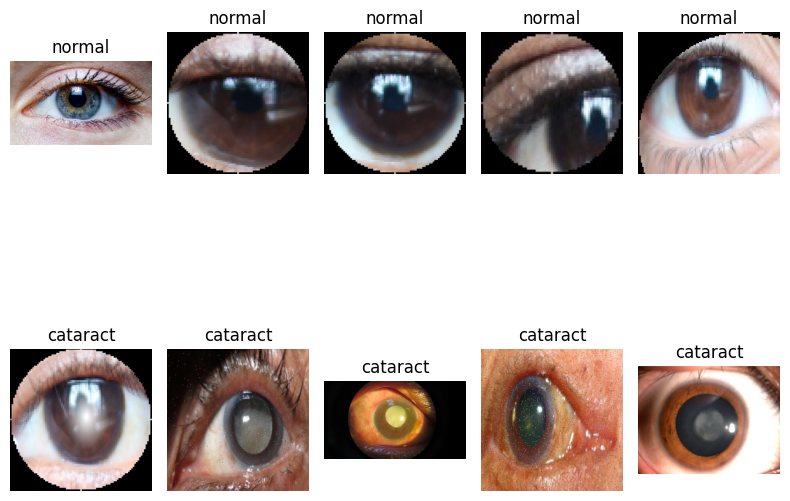

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Buat kamus berisi list nama file gambar per kelas
Prediction_image = {}
path = "/content/train"  # path ke folder train

for class_name in os.listdir(path):
    class_path = os.path.join(path, class_name)
    if os.path.isdir(class_path):
        Prediction_image[class_name] = os.listdir(class_path)

# Tampilkan 2 gambar acak per kelas
num_classes = len(Prediction_image)
fig, axs = plt.subplots(num_classes, 5, figsize=(8, 4 * num_classes))

for i, (class_name, image_list) in enumerate(Prediction_image.items()):
    # ambil 2 gambar acak
    images = np.random.choice(image_list, 5, replace=False)
    for j, img_name in enumerate(images):
        img_path = os.path.join(path, class_name, img_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img,cmap='gray')  # atau hilangkan cmap='gray' untuk warna asli
        axs[i, j].set_title(class_name)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

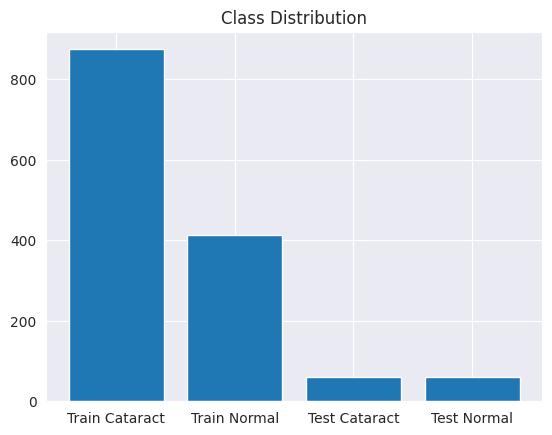

In [ ]:
# Plot distribusi
plt.bar(["Train Cataract", "Train Normal", "Test Cataract", "Test Normal"],
        [train_cataract, train_normal, test_cataract, test_normal])
plt.title("Class Distribution")
plt.show()

Max Width: 5184, Min Width: 53
Max Height: 3456, Min Height: 53


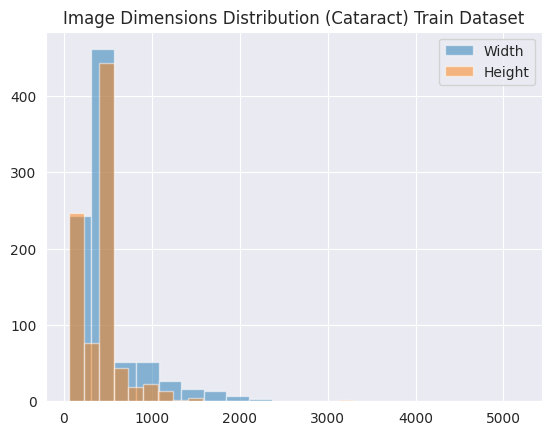

In [ ]:
def analyze_image_stats(folder_path):
    widths, heights = [], []
    for img_file in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, img_file))
        widths.append(img.width)
        heights.append(img.height)
    return widths, heights

widths, heights = analyze_image_stats("/content/train/cataract")
print(f"Max Width: {max(widths)}, Min Width: {min(widths)}")
print(f"Max Height: {max(heights)}, Min Height: {min(heights)}")

# Plot distribusi ukuran
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Image Dimensions Distribution (Cataract) Train Dataset")
plt.show()

Max Width: 5739, Min Width: 41
Max Height: 3826, Min Height: 36


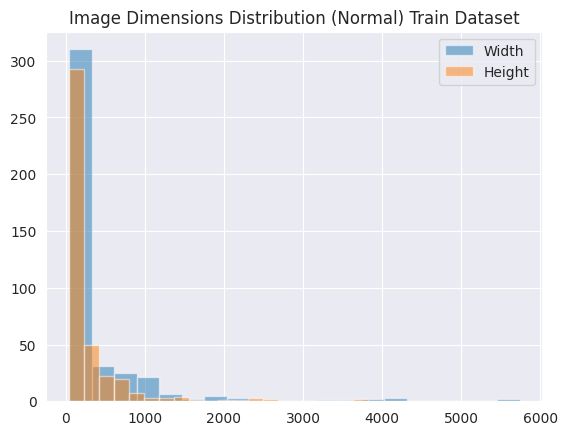

In [ ]:
widths, heights = analyze_image_stats("/content/train/normal")
print(f"Max Width: {max(widths)}, Min Width: {min(widths)}")
print(f"Max Height: {max(heights)}, Min Height: {min(heights)}")

# Plot distribusi ukuran
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Image Dimensions Distribution (Normal) Train Dataset")
plt.show()

Max Width: 6622, Min Width: 200
Max Height: 3120, Min Height: 136


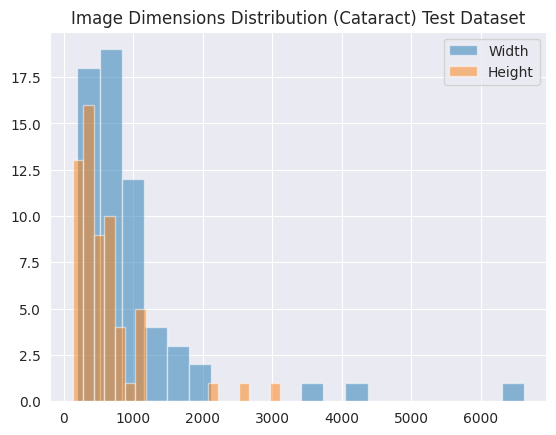

In [ ]:
widths, heights = analyze_image_stats("/content/test/cataract")
print(f"Max Width: {max(widths)}, Min Width: {min(widths)}")
print(f"Max Height: {max(heights)}, Min Height: {min(heights)}")

# Plot distribusi ukuran
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Image Dimensions Distribution (Cataract) Test Dataset")
plt.show()

Max Width: 4220, Min Width: 69
Max Height: 2556, Min Height: 55


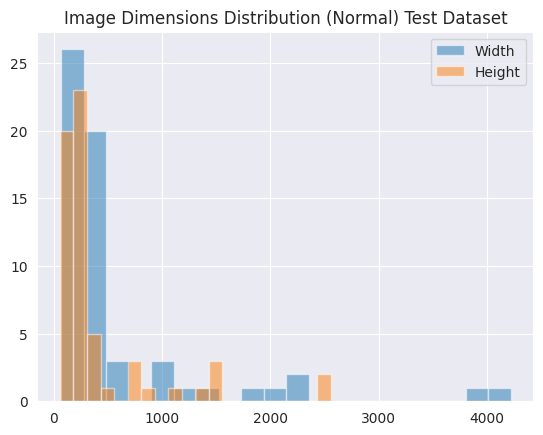

In [ ]:
widths, heights = analyze_image_stats("/content/test/normal")
print(f"Max Width: {max(widths)}, Min Width: {min(widths)}")
print(f"Max Height: {max(heights)}, Min Height: {min(heights)}")

# Plot distribusi ukuran
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Image Dimensions Distribution (Normal) Test Dataset")
plt.show()

Preprocessing

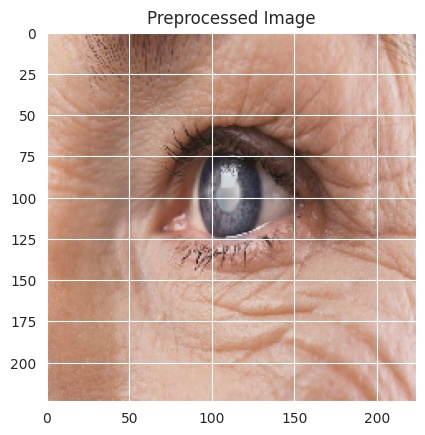

In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalisasi [0, 1]
    return img

# Contoh preprocessing satu gambar
sample_img = preprocess_image("/content/train/cataract/image_155.png")
plt.imshow(sample_img)
plt.title("Preprocessed Image")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification (cataract vs normal)
    shuffle=True
)

# Generator untuk data test (hanya normalisasi)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1286 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


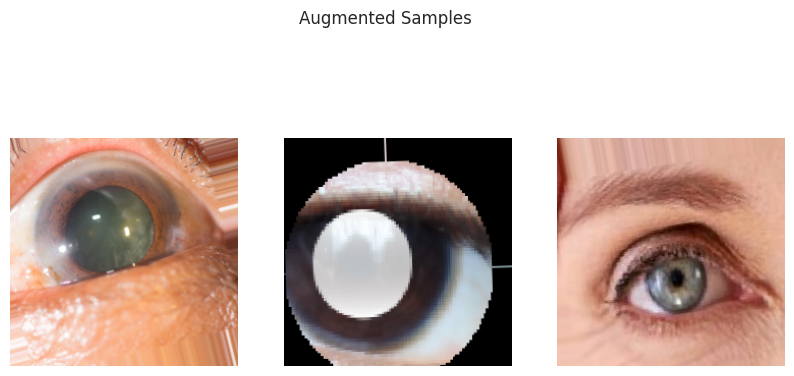

In [ ]:
augmented_images, _ = next(train_generator)
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Augmented Samples")
plt.show()

In [ ]:
print("Label Mapping:", train_generator.class_indices)
# Output harus: {'cataract': 0, 'normal': 1} atau sebaliknya

Label Mapping: {'cataract': 0, 'normal': 1}


In [ ]:
import pandas as pd
from tqdm import tqdm

def save_preprocessed_data(generator, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    filenames, labels = [], []
    for i in tqdm(range(len(generator))):
        batch_x, batch_y = generator[i]
        for j in range(len(batch_x)):
            img_path = f"{save_dir}/img_{i}_{j}.png"
            cv2.imwrite(img_path, cv2.cvtColor(batch_x[j] * 255, cv2.COLOR_RGB2BGR))
            filenames.append(img_path)
            labels.append(batch_y[j])
    return pd.DataFrame({"filename": filenames, "label": labels})

# Contoh untuk train
df_train = save_preprocessed_data(train_generator, "/content/preprocessed_train")
df_train.to_csv("/content/train_metadata.csv", index=False)

100%|██████████| 41/41 [00:39<00:00,  1.03it/s]


# **Modelling**

In [ ]:
#menggunakan callback jika data akurasi sudah 95%
class callback_model(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
            print("\n\nTarget tercapai\n")
            self.model.stop_training = True

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke data
train_dir = '/content/train'
test_dir  = '/content/test'

# Data generator (augmentasi hanya di train, rescale di kedua generator)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Definisi model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan arsitektur
model.summary()

# (Optional) Callbacks: simpan best model dan early stopping
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
]

# Training: gunakan test_generator sebagai validation_data
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=callbacks,
    verbose=1
)

Found 1286 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6676 - loss: 0.6571

41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6678 - loss: 0.6561 - val_accuracy: 0.5041 - val_loss: 0.7392
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7345 - loss: 0.5131

41/41 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7348 - loss: 0.5129 - val_accuracy: 0.7190 - val_loss: 0.5918
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7084 - loss: 0.5154 - val_accuracy: 0.7521 - val_loss: 0.5953
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7986 - loss: 0.4606

41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7983 - loss: 0.4604 - val_accuracy: 0.7603 - val_loss: 0.5475
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8193 - loss: 0.4003 - val_accuracy: 0.7686 - val_loss: 0.5686
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.8065 - loss: 0.3951

41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8070 - loss: 0.3946 - val_accuracy: 0.7521 - val_loss: 0.4983
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.8607 - loss: 0.3425

41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8605 - loss: 0.3425 - val_accuracy: 0.8347 - val_loss: 0.4823
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8642 - loss: 0.3224 - val_accuracy: 0.7769 - val_loss: 0.5002
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.8642 - loss: 0.3352

41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8643 - loss: 0.3347 - val_accuracy: 0.7934 - val_loss: 0.4810
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.8972 - loss: 0.2702

41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8973 - loss: 0.2698 - val_accuracy: 0.8264 - val_loss: 0.4500
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9034 - loss: 0.2200 - val_accuracy: 0.7190 - val_loss: 0.6247
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8710 - loss: 0.2778 - val_accuracy: 0.7438 - val_loss: 0.8925
Epoch 13/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.8676 - loss: 0.2848

41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8680 - loss: 0.2842 - val_accuracy: 0.8264 - val_loss: 0.3707
Epoch 14/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.9057 - loss: 0.2136

41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9054 - loss: 0.2141 - val_accuracy: 0.8595 - val_loss: 0.3567
Epoch 15/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.8927 - loss: 0.2482

41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8931 - loss: 0.2475 - val_accuracy: 0.8678 - val_loss: 0.2983
Epoch 16/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9297 - loss: 0.1708 - val_accuracy: 0.8430 - val_loss: 0.3750
Epoch 17/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9221 - loss: 0.1964 - val_accuracy: 0.8595 - val_loss: 0.3290
Epoch 18/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9285 - loss: 0.1857 - val_accuracy: 0.8678 - val_loss: 0.3228
Epoch 19/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9273 - loss: 0.1814 - val_accuracy: 0.8264 - val_loss: 0.4500
Epoch 20/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9302 - loss: 0.1812 - val_accuracy: 0.8595 - val_loss: 0.4223


# **Evaluasi dan Visualisasi**

In [ ]:
# Hitung akurasi training terbaik dan terakhir
best_train_acc = max(history.history['accuracy'])
best_epoch = history.history['accuracy'].index(best_train_acc) + 1
last_train_acc = history.history['accuracy'][-1]

# Evaluasi model pada test data
test_loss, test_acc = model.evaluate(test_generator, verbose=0)

# Tampilkan hasil
print(f"Akurasi Training Terbaik  : {best_train_acc:.2%} (Epoch ke-{best_epoch})")
print(f"Akurasi Training Terakhir : {last_train_acc:.2%}")
print(f"Akurasi Testing           : {test_acc:.2%}")

Akurasi Training Terbaik  : 93.16% (Epoch ke-18)
Akurasi Training Terakhir : 92.77%
Akurasi Testing           : 86.78%


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 880ms/step


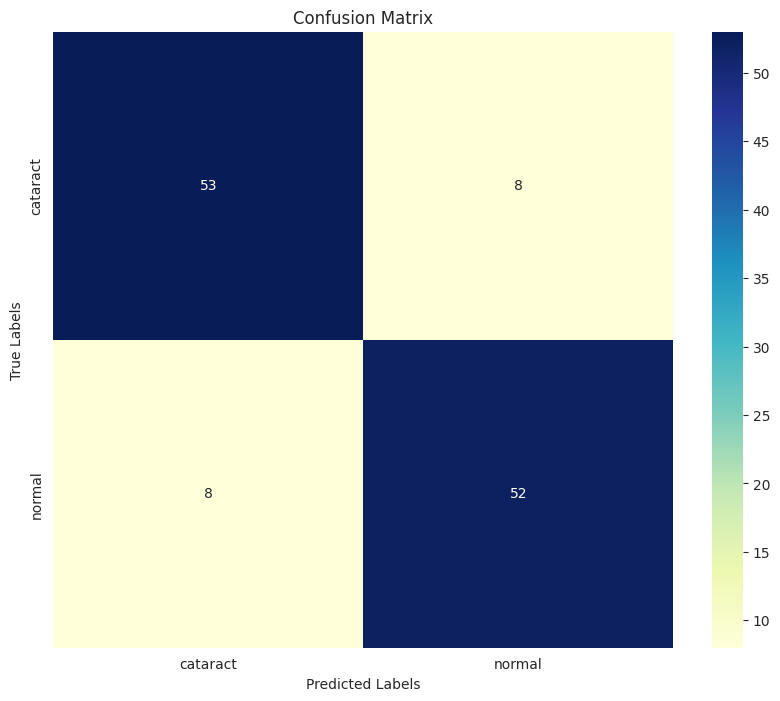

Classification Report:

              precision    recall  f1-score   support

    cataract       0.87      0.87      0.87        61
      normal       0.87      0.87      0.87        60

    accuracy                           0.87       121
   macro avg       0.87      0.87      0.87       121
weighted avg       0.87      0.87      0.87       121



In [ ]:
# Prediksi probabilitas
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)

# Label asli dari test set
y_true = test_generator.classes

# Ambil nama-nama kelas bunga dari generator
class_labels = list(test_generator.class_indices.keys())

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# **Plot Model Akurasi dan Loss**

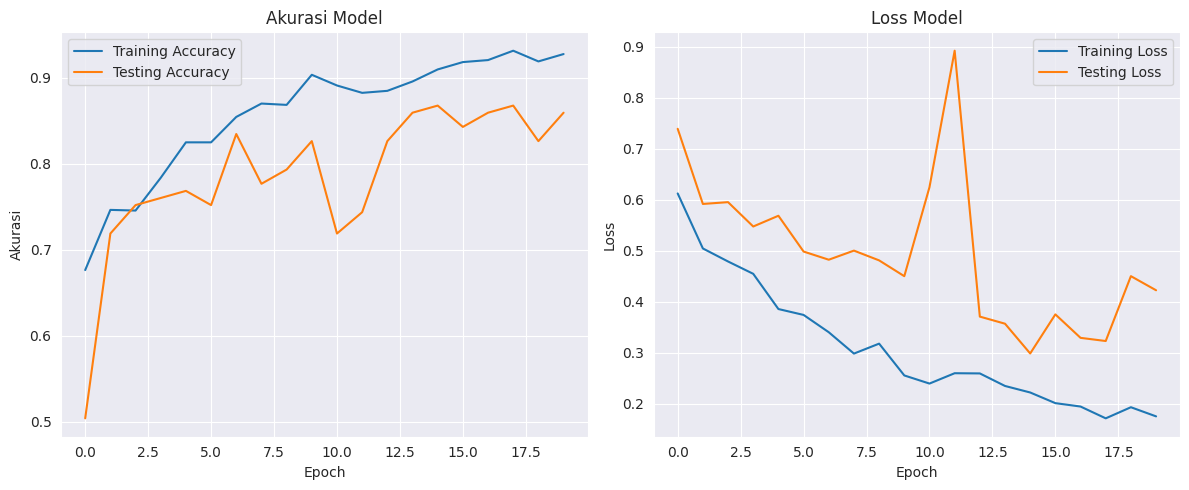

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()